# Finance Data Project - Solutions

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.<br>
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

**Install Pandas datareader:** <br>
conda install -c anaconda pandas-datareader 

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

### Introduce the Pandas DataReader in Moving Average Section:
**For now move ahead and directly load the pickled pandas object.**<br>You can load the data from internet as show below using data reader or you can simply use the pickle dataset that I saved for you<br>
**Method1: Loading Data from Internet**<br>
**Note:**Grabbing data from Google Finance and Yahoo Finance for public network has been discontinued due to data quality and other issues reported by a lot of people in the community. Hence the data from pandas repo are not reliable, although you can do the EDA on this for practice.<br>
- More relaible sources are iex, quandl, google's enterprise data but those require API keys which is paid.<br>
- I will show you how to grab data from internet using Pandas and then we will use the actual data that I have downloaded using my enterprise key provided by my organisation.

In [ ]:
#Grabbing Data from Internet using Pandas DataReader
#start = datetime.datetime(2006, 1, 1)
#end = datetime.datetime(2016, 1, 1)

# Bank of America
#BAC = data.DataReader("BAC", 'yahoo', start, end)

# CitiGroup
#C = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
#GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
#JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
#MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
#WFC = data.DataReader("WFC", 'yahoo', start, end)

In [ ]:
# Could also do this for a Panel Object
#df2 = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'yahoo', start, end)

In [ ]:
#BAC.head()

In [ ]:
#And then you can concat all the datasets into one dataset 'df2'
#tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

#Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. 
#Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**
#bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

#Set the column name levels (this is filled out for you):
#bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [ ]:
#bank_stocks.head()

**Method2: Loading Data from Pickle file**<br>
Note that I am loading data from pickle file and I will be using this data only<br>
**Picking is: taking you python objects like dataframe, list, dictionary and storing it in a serialized file format, so that later on, as required, you can quickly unpickle it and get your python object back**


In [35]:
bank_stocks = pd.read_pickle('all_banks')

In [36]:
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker             ...        MS                                  WFC  \
Stock Info    Volume    ...      Open   High    Low  Close   Volume   Open   
Date                    ...                                                  
2006-01-03   1537660    ...     57.17  58.49  56.74  58.31  5377000  31.60   
2006-01-04   1871020    ...     58.70  59.28  58.35  58.35  7977800  31.80   
2006-01-05   1143160    ...     58.55  58.59  58.02  58.51  5778000  31.50   
2006-01-06   1370250    ...     58.77  58.85  58.05  58.57  6889800  31.58   
2006-01-09   1680740    ...     58.63  59.29  58.62  59.19  4144500  31.68   

Bank Ticker                                 
Stock Info    High    Low  Close    Volume  
Date                                        
2006-01-03   31.98  31.20  31.90  11016400  
2006-01-04   31.82  31.36  31.53  10871000  
2006-01-05   31.56  31.31  31.50  10158000  
2006-01-06   31.78  31.38  31.68   8403800  
2006-01-09   31.82  31.56  31.68   5619600  

[5 rows x 30 columns]

In [ ]:
#Some Code, Just in case you wish to grab total number of dates

#b1 = bank_stocks.xs('Open', axis=1, level='Stock Info')
#b1 = b1.reset_index()
#b1['Date'].nunique()

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

**Question1: What is the max Close price for each bank's stock throughout the time period?**

**There are two ways to do this, one is normal for loop, another is using xs()**

Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers

In [24]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [25]:
#One way is this
for tick in tickers: 
    print(tick, bank_stocks[tick]['Close'].max())

BAC 54.9
C 564.1
GS 247.92
JPM 70.08
MS 89.3
WFC 58.52


In [26]:
#Another better approach is:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

**Question2: Get the Percent change of all the stocks**

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$ <br>
Basically, <br>
**Percent Change = [(Price sold - Price Purchased)/Price Purchased]*100**


In [27]:
#You have to first initialise a dataframe before using it in loop or else it gives error
returns = pd.DataFrame()

**We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [28]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


**Question3: Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

In [29]:
#Just a tip, to check any package version, e.g. seaborn, follow the below commands
#import seaborn as sns
#sns.__version__

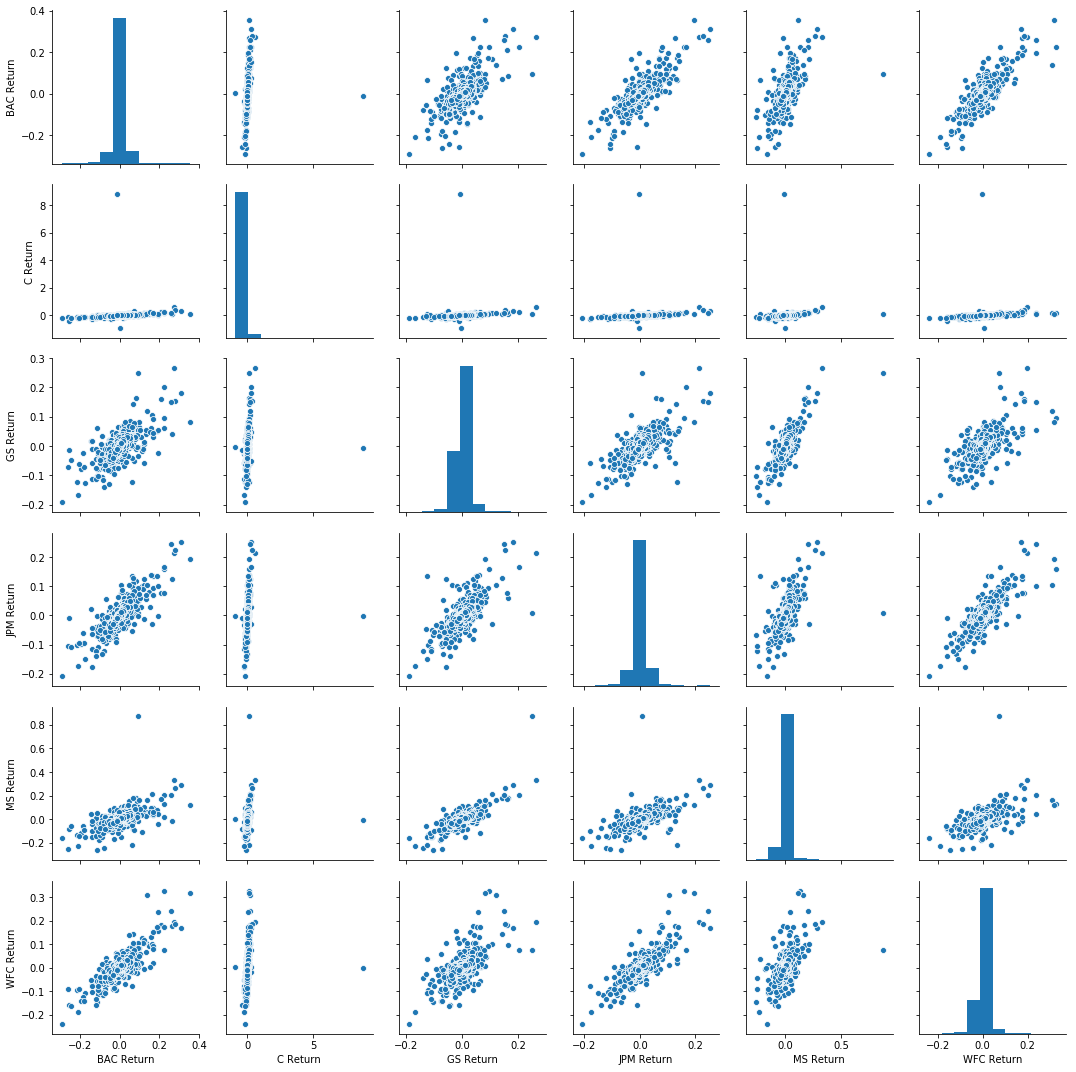

In [32]:
#returns[1:]
import seaborn as sns
sns.pairplot(returns)

#If you get any warning or error (e.g. invalid value encountered in less_equal),
#use the below command
#sns.pairplot(returns[1:])

Background on [Citigroup's Stock Crash available here.](https://en.wikipedia.org/wiki/Citigroup#November_2008.2C_Collapse_.26_US_Government_Intervention_.28part_of_the_Global_Financial_Crisis.29) 

You'll also see the enormous crash in value if you take a look a the stock price plot (which we do later in the visualizations.)

**Question4: Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns.<br> You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

**1: Worst single day return on which day?**

In [51]:
# Worst Drop (4 of them on Inauguration day)
#idmin() gives you back the index of the minimum value across index if axis=0.
#Here we have date as index and hence we are getting the date back for the day having minimum return
#refer https://www.geeksforgeeks.org/python-pandas-dataframe-idxmax/ for max min example

returns.idxmin()

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

**2: Best single day return on which day?**

In [50]:
# Best Single Day Gain
# citigroup stock split in May 2011, but also JPM day after inauguration.
returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

**You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame?**
- looks like the Citi group stock split happend that day
[Citigroup had a stock split.](https://www.citigroup.com/citi/news/2011/110509a.htm) or you can google like 'citigroup stock 2011 may'
- reverse stock split also known as 'stock merge', exactly opposite of 'stock split' where more number of stocks are merged to combine less number of stock to be traded in equity market.
- Why it happens? - There might be multiple reasons for that, e.g. to qualify minimum stock price value based on face value, **or to avoid company stocks from being de-listed (this looks like the reason here), boost company's image**, or to reduce the number of stake holders in the company etc.

**Question5: which stock would you classify as the riskiest over the entire time period?<br>
Hint - Take a look at the standard deviation of the returns**

In [54]:
returns.std() # Citigroup riskiest

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

**Question6: Which would you classify as the riskiest for the year 2015?**

In [58]:
returns.loc['2015-01-01':'2015-12-31'].std() 
# Very similar risk profiles, but Morgan Stanley or BofAmerica

#The same result can be achieved using
#returns.ix['2015-01-01':'2015-12-31'].std()
#but this method is now depricated

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

Looks like
- WFC has lowest risk
- Bank of America highest risk stock

**Question7: Create a distplot using seaborn of the 2015 returns for Morgan Stanley**

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


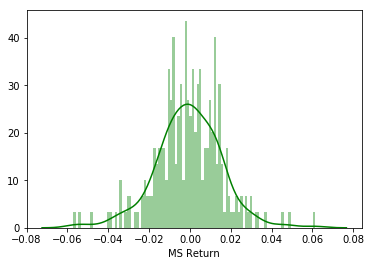

In [59]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=100)

Here we can see, as per the distribution we are looking at:
- It looks like the returns for Morgan Stanly is pretty stable
- We are looking at percentage return that deviates only about 0.06 from the average/mean

**Question8: Create a distplot using seaborn of the 2008 returns for CitiGroup**

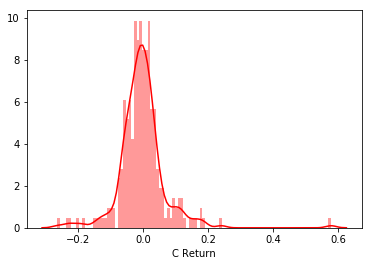

In [60]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'],color='red',bins=100)

Here we can see, as per the distribution we are looking at:
- This is quite unstable/risky
- The deviation is about 0.2
We will explore that happend to the citigroup during that year.

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

**Question9: Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

There are 2 ways to do this:
- 1. Normal loop method
- 2. xs() method

**1: Loop Method:**

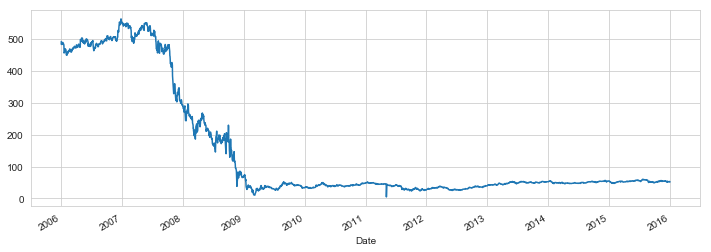

In [72]:
#Line Plot for Citi Group
bank_stocks['C']['Close'].plot(figsize=(12,4),label=tick)

#Similarly you can plot the line plot for all tickers

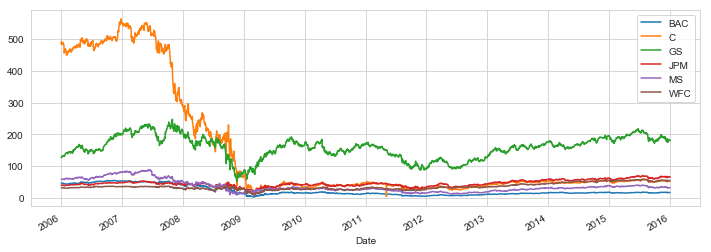

In [70]:
#Line Plot for all tickers
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()
#To move the legend out
#plt.legend(bbox_to_anchor=(1, 1), loc=2)

**Interpretation:**
- From the above trend, we can clearly see that the CitiGroup crashed after 2008, that was the recession.
- The interesting thing is Goldman Sachs dipped and quickly bounced back after the recession. Looks like a solid stock to invest in

**2: xs() method**

In [75]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').head()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,47.08,492.9,128.87,40.19,58.31,31.90
2006-01-04,46.58,483.8,127.09,39.62,58.35,31.53
2006-01-05,46.64,486.2,127.04,39.74,58.51,31.50
2006-01-06,46.57,486.2,128.84,40.02,58.57,31.68
2006-01-09,46.60,483.9,130.39,40.67,59.19,31.68


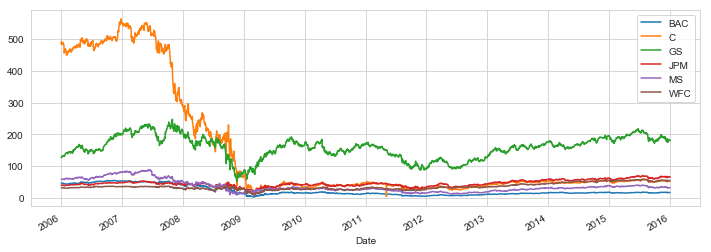

In [81]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot(figsize=(12,4))
#To move the legend out
plt.legend(bbox_to_anchor=(1, 1), loc='best')

In [82]:
# plotly
#This may give you a value error, depending on the version. 
#This is a bug, yet to be fixed
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot(kind='line')

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

### Introduce Pandas DataReader Section Here###

In [84]:
from pandas_datareader import data

In [85]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)
# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)

In [87]:
BAC.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,36.147552
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,35.763645
2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700.0,35.809727
2006-01-06,46.910000,46.349998,46.799999,46.570000,12599800.0,35.755962
2006-01-09,46.970001,46.360001,46.720001,46.599998,15619400.0,35.779007


In [88]:
#loadind other data banks data from Internet
# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

In [89]:
# Could also do this for a Panel Object
#df2 = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'yahoo', start, end)

In [104]:
#And then you can concat all the datasets into one dataset 'df2'
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [110]:
#Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. 
#Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

In [111]:
#Set the column name levels (this is filled out for you):
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

**Question10: Plot the closing stock prices for the year 2008**

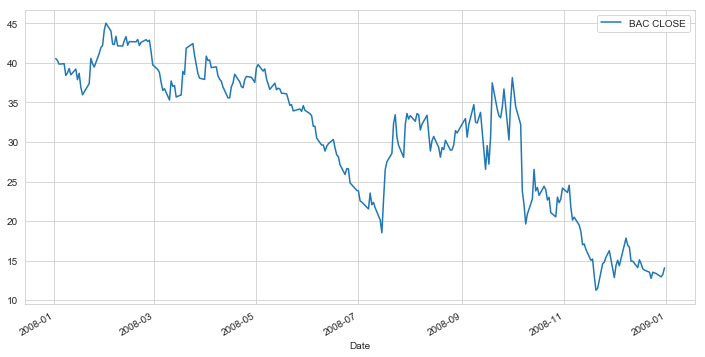

In [122]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

**Question 11: Plot the rolling 30 day average Close Price for Bank Of America's stock for the year 2008**

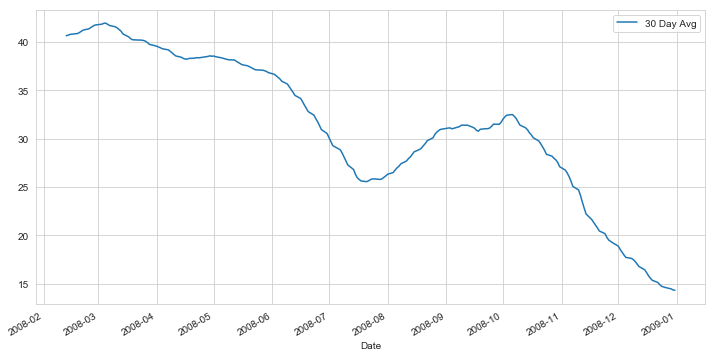

In [128]:
plt.figure(figsize=(12,6))
#rolling(): Provides rolling window calculations
#window: Size of the moving window. This is the number of observations used for calculating the statistic
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
plt.legend()

**Question 12: Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

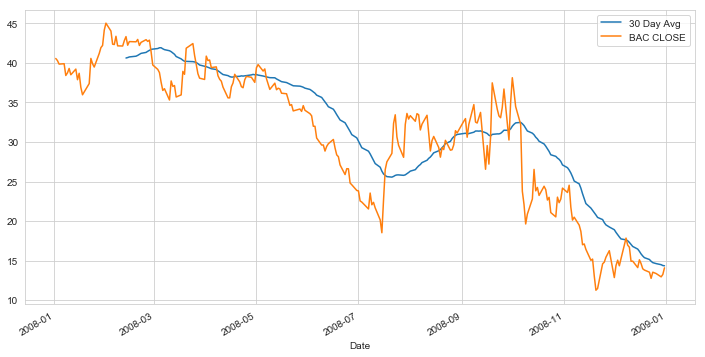

In [127]:
plt.figure(figsize=(12,6))
#rolling(): Provides rolling window calculations
#window: Size of the moving window. This is the number of observations used for calculating the statistic
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

**Question13: Create a heatmap of the correlation between the stocks Close Price.**

In [129]:
bank_stocks.head(2)

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   

Bank Ticker                      C                                      \
Stock Info   Adj Close        High         Low        Open       Close   
Date                                                                     
2006-01-03   36.147552  493.799988  481.100006  490.000000  492.899994   
2006-01-04   35.763645  491.000000  483.500000  488.600006  483.799988   

Bank Ticker    ...             MS                                      WFC  \
Stock Info     ...           Open      Close     Volume  Adj Close    High   
Date           ...                                                           
2006-01-03     ...      57.169998  58.310001  5377000.0  38.591286  31.975   
2006-01-04     ...      58.700001  58.349998  7977800.0  38.617764  31.820   

Bank Ticker                                                       
Stock Info      Low       Open      Close      Volume  Adj Close  
Date                                                              
2006-01-03   31.195  31.600000  31.900000  11016400.0  21.485973  
2006-01-04   31.365  31.799999  31.530001  10870000.0  21.236753  

[2 rows x 36 columns]

In [135]:
#Lets build the datafram for this first and a correlation matrix first
hm = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
hm

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Bank Ticker,,,,,,
BAC,1.000000,0.971516,0.550898,0.103874,0.944218,0.008542
C,0.971516,1.000000,0.434123,0.003515,0.933609,-0.068536
GS,0.550898,0.434123,1.000000,0.685286,0.683792,0.499897
JPM,0.103874,0.003515,0.685286,1.000000,0.250427,0.940269
MS,0.944218,0.933609,0.683792,0.250427,1.000000,0.131835
WFC,0.008542,-0.068536,0.499897,0.940269,0.131835,1.000000


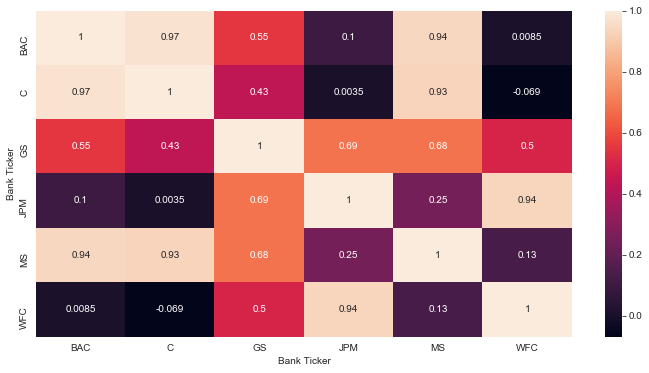

In [137]:
#Lets plt the heatmap for that
plt.figure(figsize=(12,6))
sns.heatmap(hm,annot=True)

**Question12: Use seaborn's clustermap to cluster the correlations together:**

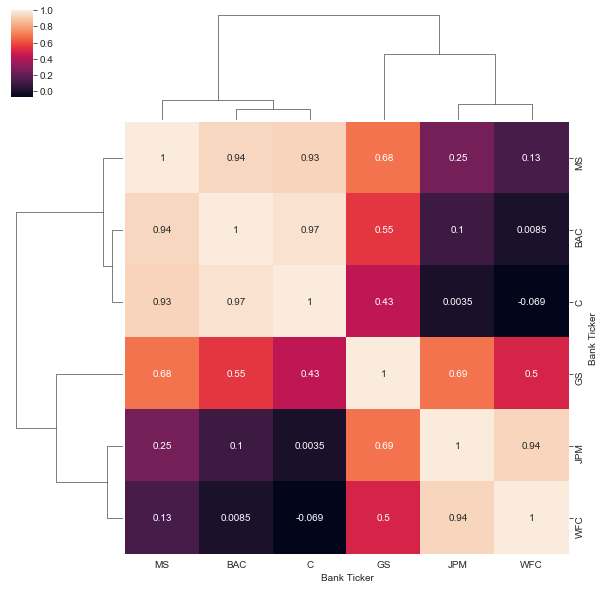

In [138]:
sns.clustermap(hm,annot=True)

In [141]:
hm.iplot(kind='heatmap',colorscale='rdylbu')

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

**Question13: Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [142]:
BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

**Question14: Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [148]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[10,20, 25],title='Simple Moving Averages')
#period attribute is simply given to calculate the moving average over that period.
#Here we are asking it to create a moving average over 10-periods, 20-periods, 30-periods
#basically, Moving average of past 10 prices, past 20 prices and past 30 prices

**Question15: Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

What is a Bollinger Band chart? <br>
Bollinger Bands are a type of statistical chart characterizing the prices and volatility over time of a financial instrument or commodity, using a formulaic method propounded by John Bollinger in the 1980
- It shows the standard deviation of the stock price as it moves out through time
- You see the upper and lower band of price as well as the simple moving arverage and closing price

In [144]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')